[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\19294\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


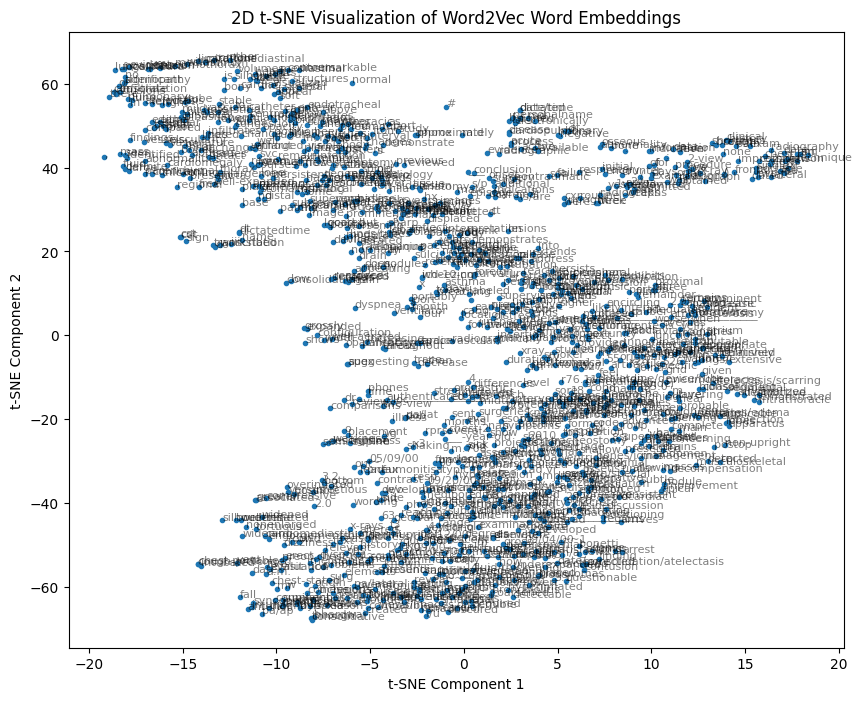

In [5]:
import pandas as pd
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import re
import numpy as np

nltk.download('punkt')  # Download the punkt tokenizer

# Read data from CSV
df = pd.read_csv('open_ave_data.csv')

# Concatenate text from multiple columns into a single text column
df['combined_text'] = df['findings'].astype(str) + ' ' + df['clinicaldata'].astype(str) + ' ' + df['ExamName'].astype(str) + ' ' + df['impression'].astype(str)

# Tokenize the combined text data
tokenized_data = [word_tokenize(text.lower()) for text in df['combined_text']]
date_pattern = r'\b\d{2}/\d{2}/\d{4}\b'
time_pattern = r'\b\d{2}:\d{2}\b'
time_pattern2 = r'\b\d{1}:\d{2}\b'
time_pattern3 = r'\b\d{1,2}:\d{2}\b'

def remove_dates(text):
    text_without_dates = re.sub(date_pattern, '', text)
    text_without_times = re.sub(time_pattern, '', text_without_dates)
    text_without_times1 = re.sub(time_pattern2, '', text_without_times)
    text_without_times2 = re.sub(time_pattern3, '', text_without_times1)
    return text_without_times2

tokenized_data = [[remove_dates(text) for text in inner_list] for inner_list in tokenized_data]
#tokenized_data = [remove_dates(text) for text in tokenized_data]

word2vec_model = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, min_count=1, workers=4)

word_vector = word2vec_model.wv['lung']

# Find similar words to a given word
similar_words = word2vec_model.wv.most_similar('heart', topn=5)

words = list(word2vec_model.wv.index_to_key)

vectors = [word2vec_model.wv[word] for word in words]
vectors_np = np.array(vectors)
vectors_np.flatten()



tsne = TSNE(n_components=2, random_state=42)
word_vectors_2d = tsne.fit_transform(vectors_np)

df_2d = pd.DataFrame(data=word_vectors_2d, columns=['x', 'y'])
df_2d['word'] = words

plt.figure(figsize=(10, 8))
plt.scatter(df_2d['x'], df_2d['y'], marker='.')
for i, word in enumerate(df_2d['word']):
    plt.annotate(word, (df_2d['x'][i], df_2d['y'][i]), alpha=0.5, fontsize=8)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('2D t-SNE Visualization of Word2Vec Word Embeddings')
plt.show()


